In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from typing import List
import time

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# Загрузка данных

In [2]:
data_102 = pd.read_csv("Таёжное 102.csv", delimiter=";") #и сразу перевернем
data_103 = pd.read_csv("Таёжное 103.csv", delimiter=";")

In [3]:
data_102 = data_102.fillna('')
data_103 = data_103.fillna('')

data_102 = data_102.loc[::-1].reset_index(drop=True)
data_103 = data_103.loc[::-1].reset_index(drop=True)

In [4]:
data_102

,Number,H,Depth,Rock,Color,ТЕКСТУРА,Включения органогенные,Включения минеральные,НЕФТЕНАСЫЩЕНИЕ,ПОДОШВА СЛОЯ
0,13,0.60,1011.00,Песчаники крупнозернистые,\серые,Массивная,Углистый детрит,,,неровная
1,12,1.10,1011.60,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,неровная
2,11,0.45,1012.70,Песчаники крупнозернистые,\бежевые,Массивная,,Нефть,Умеренное,ровная
3,10,0.20,1013.15,Известняки песчанистые,белесо-\бежевые,Массивная,,,,ровная
4,9,0.94,1013.35,Песчаники крупнозернистые,серо-\бежевые,Массивная,,,,неровная
5,8,0.81,1014.29,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,ровная
6,7,0.31,1015.10,Угли,\чёрные,Горизонтальная параллельная,,,,ровная
7,6,0.84,1015.41,Глины,\темно-серые,Горизонтальная параллельная,Углистый детрит,,,неровная
8,5,0.92,1016.25,Песчаники крупнозернистые,\бежевые,Массивная,,,,неровная
9,4,0.62,1017.17,Глины,\темно-серые,Горизонтальная параллельная\Горизонтальная вол...,Углистые остатки,,,неровная


In [5]:
data_103

,Number,H,Depth,Rock,Color,ТЕКСТУРА,Включения органогенные,Включения минеральные,НЕФТЕНАСЫЩЕНИЕ,ПОДОШВА СЛОЯ
0,14,0.8,998.2,Песчаники крупнозернистые,\серые,Массивная,Углистый детрит,,,неровная
1,13,1.0,999.0,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,неровная
2,14,0.8,1000.0,Песчаники крупнозернистые,\серые,Массивная,Углистый детрит,,,неровная
3,13,1.0,1000.8,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,неровная
4,12,0.5,1001.8,Песчаники крупнозернистые,\бежевые,Массивная,,Нефть,Умеренное,ровная
5,11,0.7,1002.3,Известняки песчанистые,белесо-\бежевые,Массивная,,,,ровная
6,10,1.0,1003.0,Песчаники крупнозернистые,серо-\бежевые,Массивная,,,,неровная
7,9,0.8,1004.0,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,ровная
8,8,0.3,1004.8,Угли,\чёрные,Горизонтальная параллельная,,,,ровная
9,7,0.8,1005.1,Глины,\темно-серые,Горизонтальная параллельная,Углистый детрит,,,неровная


In [6]:
descr_102 = [rock for rock in data_102.iloc[:,3:].sum(axis=1)]
descr_103 = [rock for rock in data_103.iloc[:,3:].sum(axis=1)]

In [7]:
descr_102

['Песчаники крупнозернистые\\серыеМассивнаяУглистый детритнеровная',
 'Глины\\темно-серыеГоризонтальная параллельнаяУглистые остаткинеровная',
 'Песчаники крупнозернистые\\бежевыеМассивнаяНефтьУмеренноеровная',
 'Известняки песчанистыебелесо-\\бежевыеМассивнаяровная',
 'Песчаники крупнозернистыесеро-\\бежевыеМассивнаянеровная',
 'Глины\\темно-серыеГоризонтальная параллельнаяУглистые остаткировная',
 'Угли\\чёрныеГоризонтальная параллельнаяровная',
 'Глины\\темно-серыеГоризонтальная параллельнаяУглистый детритнеровная',
 'Песчаники крупнозернистые\\бежевыеМассивнаянеровная',
 'Глины\\темно-серыеГоризонтальная параллельная\\Горизонтальная волнистаяУглистые остаткинеровная',
 'Песчаники крупнозернистыесеро-\\бежевыеМассивная\\Горизонтальная параллельнаяНефтьНезначительноенеровная',
 'Глины\\темно-серыеГоризонтальная параллельнаяУглистый детритнеровная',
 'Песчаники крупнозернистыебуро-\\бежевыеМассивнаяНефтьУмеренноене охарактеризована керном']

In [8]:
descr_103

['Песчаники крупнозернистые\\серыеМассивнаяУглистый детритнеровная',
 'Глины\\темно-серыеГоризонтальная параллельнаяУглистые остаткинеровная',
 'Песчаники крупнозернистые\\серыеМассивнаяУглистый детритнеровная',
 'Глины\\темно-серыеГоризонтальная параллельнаяУглистые остаткинеровная',
 'Песчаники крупнозернистые\\бежевыеМассивнаяНефтьУмеренноеровная',
 'Известняки песчанистыебелесо-\\бежевыеМассивнаяровная',
 'Песчаники крупнозернистыесеро-\\бежевыеМассивнаянеровная',
 'Глины\\темно-серыеГоризонтальная параллельнаяУглистые остаткировная',
 'Угли\\чёрныеГоризонтальная параллельнаяровная',
 'Глины\\темно-серыеГоризонтальная параллельнаяУглистый детритнеровная',
 'Песчаники крупнозернистые\\бежевыеМассивнаянеровная',
 'Угли\\чёрныеГоризонтальная параллельнаяровная',
 'Глины\\темно-серыеГоризонтальная параллельная\\Горизонтальная волнистаяУглистые остаткинеровная',
 'Песчаники крупнозернистыесеро-\\бежевыеМассивная\\Горизонтальная параллельнаяНефтьНезначительноенеровная',
 'Глины\\темно-се

In [9]:
def levenshtein_custom(str1, str2):
    start = time.time()
    levenstein_matrix = np.zeros(shape=(len(str1)+1, len(str2)+1))
    levenstein_matrix[:,0] = np.arange(len(str1)+1)
    levenstein_matrix[0,:] = np.arange(len(str2)+1)

    for i in range(1, levenstein_matrix.shape[0]):
    
        for j in range(1, levenstein_matrix.shape[1]):
            
            left_val = levenstein_matrix[i, j-1] + 1
            upper_val = levenstein_matrix[i-1, j] + 1
            
            if str1[i-1] == str2[j-1]:
                diag_val = levenstein_matrix[i-1, j-1]
            else:
                diag_val = levenstein_matrix[i-1, j-1] + 1
            
            insert_value = min([left_val, upper_val, diag_val])
            
            levenstein_matrix[i,j] = insert_value
    print("Finished in ", time.time()-start)
    return levenstein_matrix


# Матрица ливеншнтейна

Finished in  0.0


<Axes: >

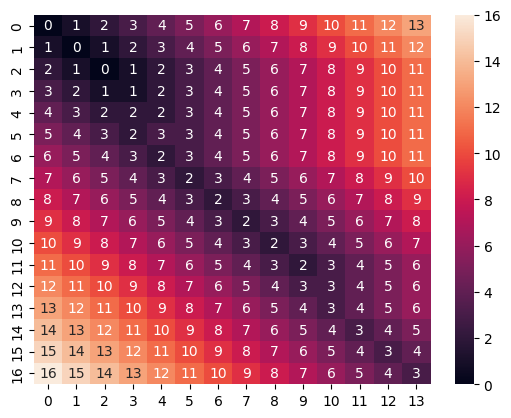

In [10]:
lev_matr = levenshtein_custom(descr_103, descr_102)
sns.heatmap(lev_matr, annot=True)

# Редакционное предписание

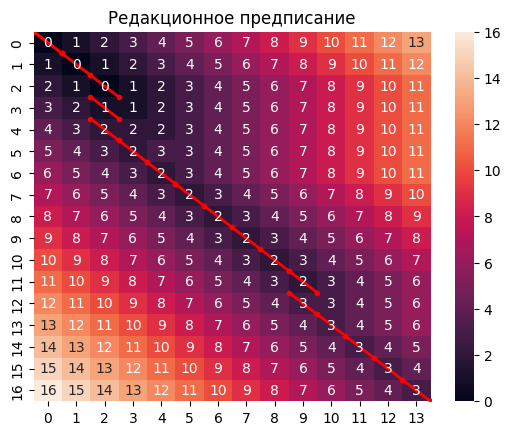

In [11]:
sns.heatmap(lev_matr, annot=True) 

# Здесь будем хранить информацию о коррелировании пластов
correlate = [] 

i = lev_matr.shape[0]-1
j = lev_matr.shape[1]-1

search_value = lev_matr[i, j]

# Каждый раз визуализируем наш путь

plt.plot([13,14], [16,17], color='red', linestyle='-', linewidth=2, marker='o', markersize=3, markeredgecolor='red')

while i != 0 and j != 0:
        
        left_val = lev_matr[i, j-1]
        upper_val = lev_matr[i-1, j]
        diag_val = lev_matr[i-1, j-1]
        
        # Когда породы коррелируют (диагонали равны) - ничего не меняем
        if (search_value == diag_val and left_val == upper_val) or search_value == upper_val:
            
            plt.plot([j-1,j], [i-1,i], color='red', linestyle='-', linewidth=2, marker='o', markersize=3, markeredgecolor='red')
            
            correlate.append('Пласты коррелируют')
            
            i -= 1
            j -= 1
            
            search_value = lev_matr[i][j]
         
        # Когда необходимо вставить букву = выкливается пласт Таежная 3
        elif min([left_val, upper_val, diag_val]) == upper_val:
            
            plt.plot([j,j+1], [i-1,i], color='red', linestyle='-', linewidth=2, marker='o', markersize=3, markeredgecolor='red')
            
            correlate.append('Пласт Таежная_3 - выклинивается')
            
            i -= 1
            
            search_value = lev_matr[i][j]
            
        # Когда необходимо поменять буквы - корреляция пластов
        elif min([left_val, upper_val, diag_val]) == diag_val:
            
            plt.plot([j-1,j], [i-1,i], color='red', linestyle='-', linewidth=2, marker='o', markersize=3, markeredgecolor='red')
            
            correlate.append('Пласты коррелируют')

            
            i -= 1
            j-= 1
            
            search_value = lev_matr[i][j]
            
        # Когда необходимо удалить букву, но такого быть не должно
        elif min([left_val, upper_val, diag_val]) == left_val:
            
            # Рисование ломаной линии
            plt.plot([j-2,j-1], [i-1,i], color='red', linestyle='-', linewidth=2, marker='o', markersize=3, markeredgecolor='red')
            
            correlate.append('Пласт Таежная_2 - выклинивается')

            
            j -= 1
            
            search_value = lev_matr[i][j]

plt.plot([0,1], [0,1], color='red', linestyle='-', linewidth=2, marker='o', markersize=3, markeredgecolor='red')

plt.title('Редакционное предписание')
correlate = correlate[::-1]
# Отображение графика
plt.show()

In [48]:
correlate

['Пласты коррелируют',
 'Пласты коррелируют',
 'Пласт Таежная_3 - выклинивается',
 'Пласт Таежная_3 - выклинивается',
 'Пласты коррелируют',
 'Пласты коррелируют',
 'Пласты коррелируют',
 'Пласты коррелируют',
 'Пласты коррелируют',
 'Пласты коррелируют',
 'Пласты коррелируют',
 'Пласт Таежная_3 - выклинивается',
 'Пласты коррелируют',
 'Пласты коррелируют',
 'Пласты коррелируют',
 'Пласты коррелируют']

In [54]:
len(dep_2)

13

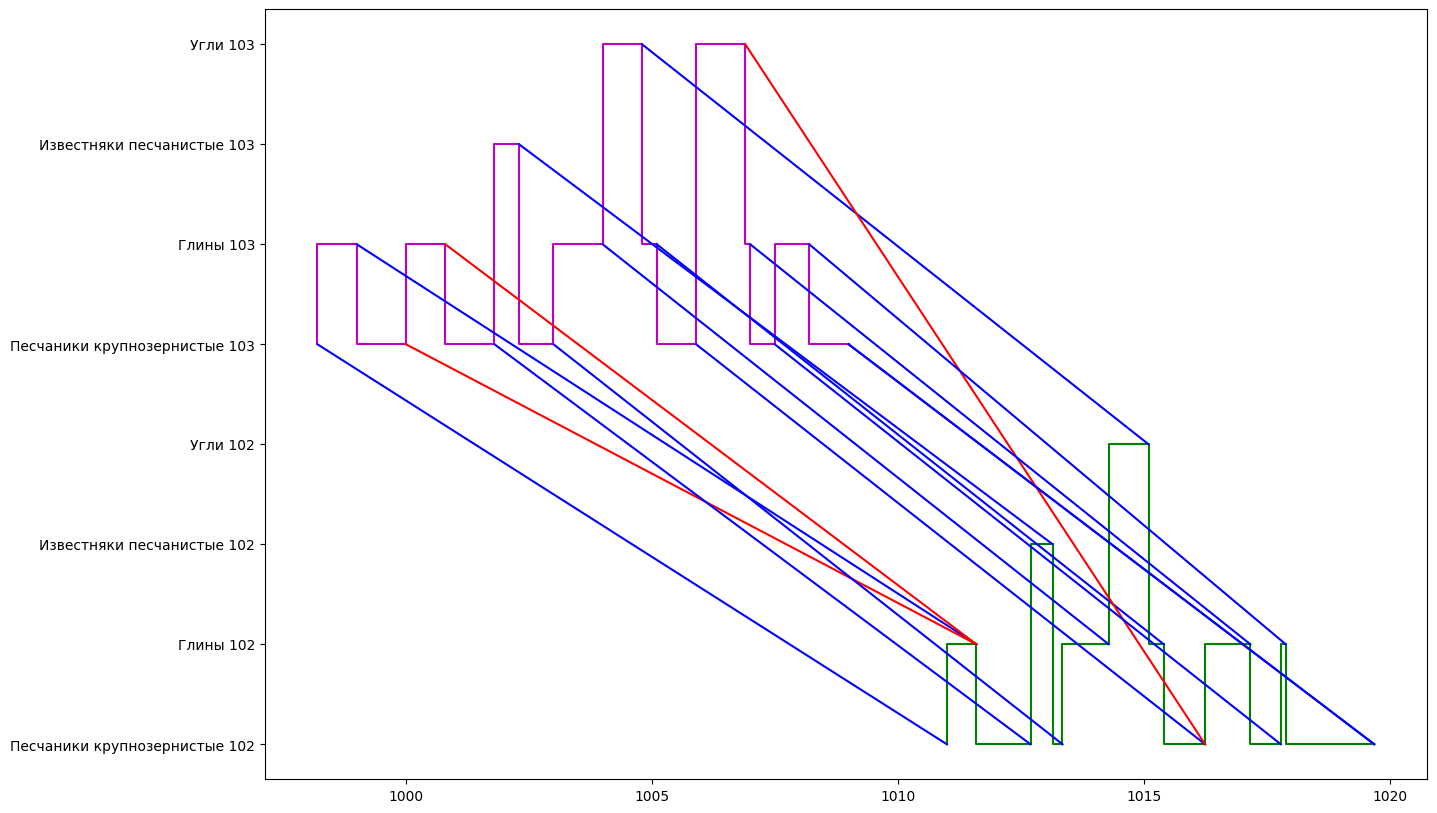

In [65]:
dep_2 = [1*i for i in data_102.Depth]
dep_3 = [1*i for i in data_103.Depth]
rock_2 = [i + " 102" for i in data_102.Rock]
rock_3 = [i + " 103" for i in data_103.Rock]

corr_lines = [1 if 'Пласты коррелируют' == i else 0 for i in correlate]

fig, ax = plt.subplots(figsize=(15,10))
ax.step(dep_2, rock_2, c="g")
ax.step(dep_3, rock_3, c="m")

lag = 0
j = None
for i in range(-1, len(corr_lines)):
    if corr_lines[i]:
        j=i
        ax.plot([dep_2[i-lag], dep_3[i]], [rock_2[i-lag], rock_3[i]], c="b")
    else:
        ax.plot([dep_2[j-lag], dep_3[i]], [rock_2[j-lag], rock_3[i]], c="r")
        lag+=1
        j+=1